# Results Plotting

This is a simple notebook displaying some of the results visualisation functionalities available in `aeon.`

This is in-progress, and does not contain detailed descriptions and documentation yet.

In [1]:
import numpy as np

classifiers = ["Classifier 1", "Classifier 2", "Classifier 3", "Classifier 4"]
classifier_accuracies = [
    [0.8, 0.7, 0.6, 0.5],
    [0.7, 0.9, 0.4, 0.0],
    [0.8, 0.7, 0.6, 0.5],
    [0.7, 0.9, 0.4, 0.0],
    [0.7, 0.6, 0.5, 0.4],
]
regressor_preds = [0.8, 0.7, 0.6, 0.5]
regressor_targets = [0.9, 0.7, 0.4, 0.0]

## Critical Difference

In [2]:
from aeon.visualisation import plot_critical_difference

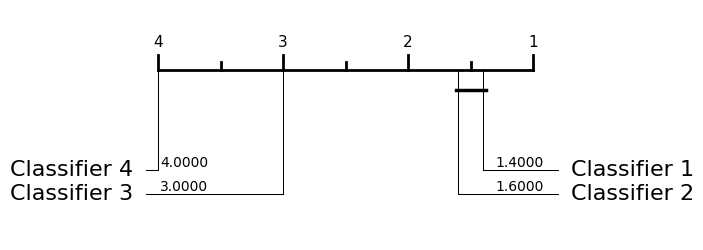

In [3]:
_ = plot_critical_difference(classifier_accuracies, classifiers)

## Scatter Diagrams

In [4]:
from aeon.visualisation import (
    plot_pairwise_scatter,
    plot_scatter_predictions,
    plot_score_vs_time_scatter,
)

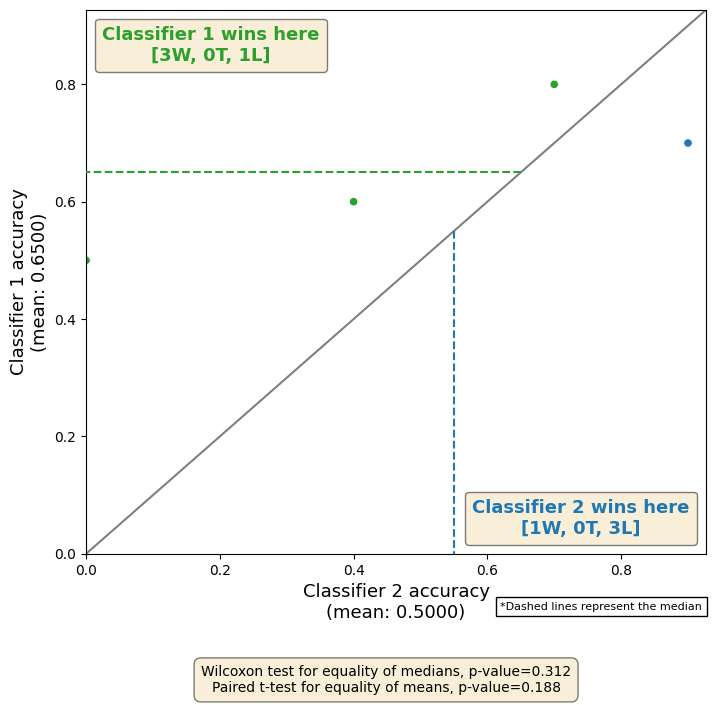

In [5]:
_ = plot_pairwise_scatter(
    classifier_accuracies[0], classifier_accuracies[1], classifiers[0], classifiers[1]
)

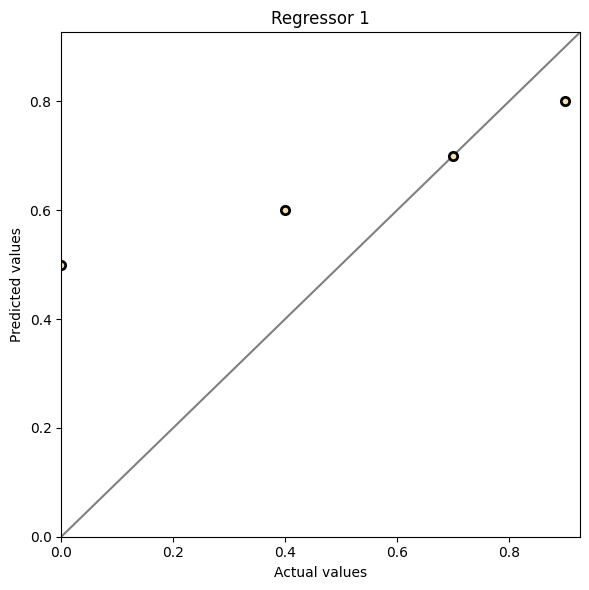

In [6]:
_ = plot_scatter_predictions(regressor_targets, regressor_preds, title="Regressor 1")

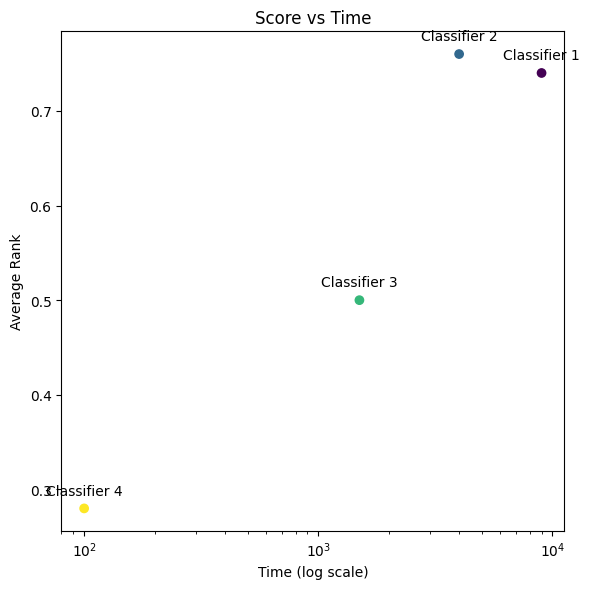

In [7]:
_ = plot_score_vs_time_scatter(
    np.mean(classifier_accuracies, axis=0),
    [9000, 4000, 1500, 100],
    names=classifiers,
    title="Score vs Time",
    log_time=True,
)

## Box Plots

In [8]:
from aeon.visualisation import plot_boxplot

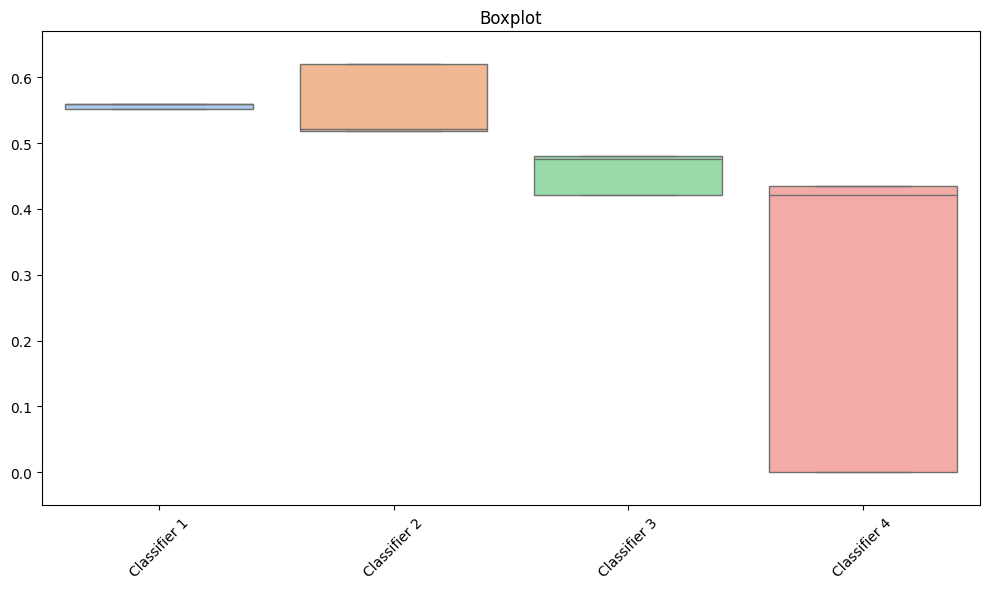

In [9]:
_ = plot_boxplot(
    classifier_accuracies,
    classifiers,
    relative=True,
    plot_type="boxplot",
    title="Boxplot",
)

## Multiple Comparison Matrix

A multiple comparison matrix is a heat map that shows the results of multiple pairwise 
comparisons between classifiers. It is highly configurable. You can save the figure 
to pdf or png, or even output the matrix as native latex code. A couple of examples 
follow


In [2]:
import pandas as pd

df = pd.DataFrame(classifier_accuracies, columns=classifiers)
df.head()

,Classifier 1,Classifier 2,Classifier 3,Classifier 4
0,0.8,0.7,0.6,0.5
1,0.7,0.9,0.4,0.0
2,0.8,0.7,0.6,0.5
3,0.7,0.9,0.4,0.0
4,0.7,0.6,0.5,0.4


<Figure size 640x480 with 0 Axes>

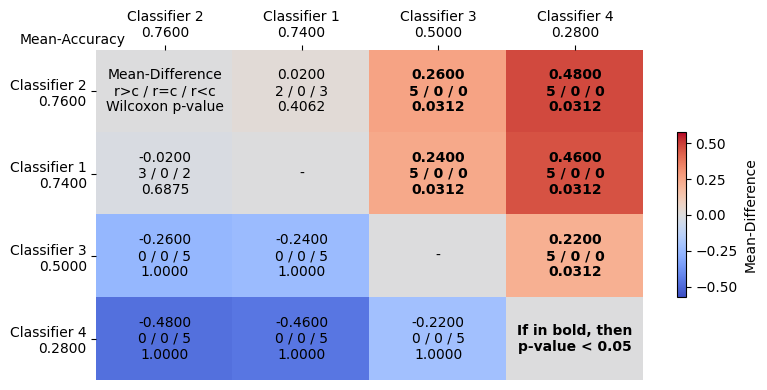

In [3]:
from aeon.visualisation.results import create_multi_comparison_matrix

create_multi_comparison_matrix(df, fig_size="8,4")

<Figure size 640x480 with 0 Axes>

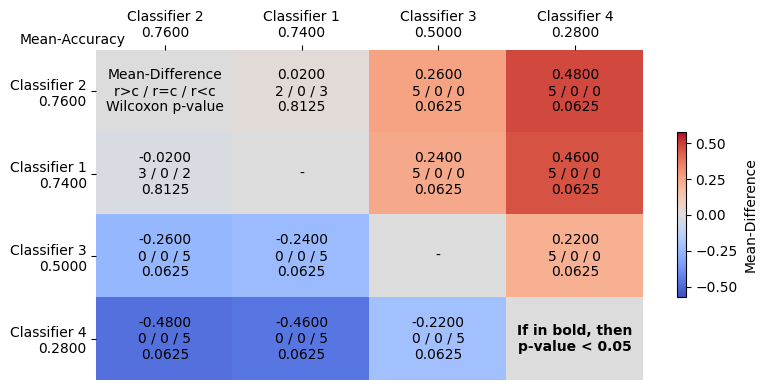

In [4]:
from aeon.visualisation.results import create_multi_comparison_matrix

create_multi_comparison_matrix(
    df, fig_size="8,4", pvalue_test_params={"alternative": "two-sided"}
)

<Figure size 640x480 with 0 Axes>

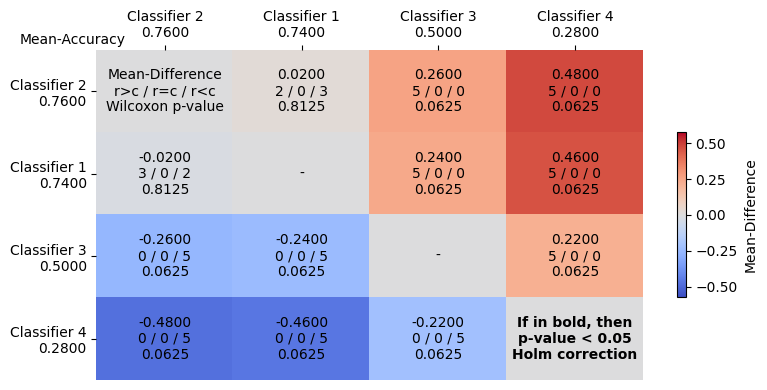

In [5]:
from aeon.visualisation.results import create_multi_comparison_matrix

create_multi_comparison_matrix(
    df,
    fig_size="8,4",
    pvalue_test_params={"alternative": "two-sided"},
    pvalue_correction="holm",
)

<Figure size 640x480 with 0 Axes>

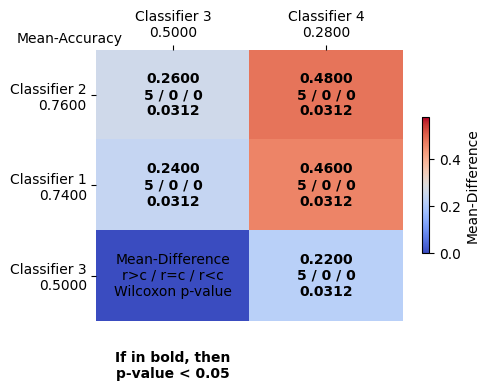

In [24]:
from aeon.visualisation.results import create_multi_comparison_matrix

create_multi_comparison_matrix(
    df,
    fig_size="5,4",
    row_comparates=["Classifier 1", "Classifier 2", "Classifier 3"],
    col_comparates=["Classifier 3", "Classifier 4"],
)

<Figure size 640x480 with 0 Axes>

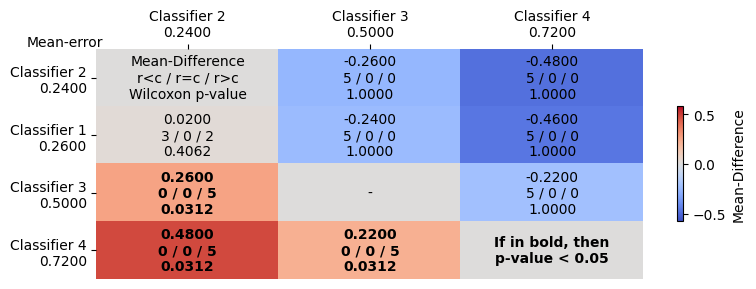

In [17]:
errors = 1 - np.array(classifier_accuracies)
df2 = pd.DataFrame(errors, columns=classifiers)

create_multi_comparison_matrix(
    df_results=df2,
    excluded_col_comparates=["Classifier 1"],
    used_statistic="error",
    order_better="increasing",
    order_win_tie_loss="lower",
    fig_size="8,3",
    win_label="r<c",
    loss_label="r>c",
)